# Test pubLN, load

## Load annotations

In [1]:
from pathlib import Path
import json

with open(Path("../data/publaynet/dev.json")) as f:
  samples = json.load(f)

print(f' nb pdfs {len(samples["annotations"])}')
print(f'schema {samples.keys()}')
print(f'Schema annotations:\n\tTaille {len(samples["annotations"])} -->  {samples["annotations"][0].keys()}')
print(f'Schema images:\n\tTaille {len(samples["images"])} -->  {samples["images"][0].keys()}')
print(f'Schema categories:\n\tTaille {len(samples["categories"])} -->  {samples["categories"][0].keys()}\n\t{samples["categories"]}')

FileNotFoundError: [Errno 2] No such file or directory: '../data/publaynet/dev.json'

## xml files (pmc_id, pdf_name, nxml_name)

In [ ]:
import os
import numpy as np

dir = '../data/publaynet/xmls/'
xmls_names = {} # {pmc = {xml_fname, pdf_fname}}

for root, directories, files in os.walk(dir):
  for pmc in directories:
    fdir = dir + pmc
    for root2, directories2, files2 in os.walk(fdir):
      xml_fname = None
      pdfs_fnames = []
      for file in files2:
        if file.split('.')[-1] == 'nxml':
          xml_fname = file
        if file.split('.')[-1] == 'pdf':
          pdfs_fnames.append(file)
      
      lenghts = [len(pf) for pf in pdfs_fnames]
      if len(lenghts) == 0:
        print(f'fdir ==> {fdir}')
      
      i_min = np.argmin(lenghts)
      xmls_names[pmc] = {'xml' :xml_fname, 'pdf': pdfs_fnames[i_min]}
  break

In [5]:
labels = ['pol', 'dir', 'vect', 'rien']
items = dict.fromkeys(labels)
{v: i for i, v in enumerate(items)}

{'pol': 0, 'dir': 1, 'vect': 2, 'rien': 3}

In [ ]:
print('bonjour')

# BIOUL dec

In [2]:
!ls ../../edspdf-train/data/dataset/test/10535594504*

../../edspdf-train/data/dataset/test/10535594504.json
../../edspdf-train/data/dataset/test/10535594504.pdf


In [3]:
from pathlib import Path
import json

with open(Path("../../edspdf-train/data/dataset/test/10535594504.json")) as f:
  annotation_10535594504 = json.load(f)
pdf_10535594504 = Path("../../edspdf-train/data/dataset/test/10535594504.pdf").read_bytes()

print(f'schema {annotation_10535594504.keys()}')
print(f"number of annotations: {len(annotation_10535594504['annotations'])}")
print(f'note id: {annotation_10535594504["note_id"]}')
print(f'note type: {annotation_10535594504["note_type"]}')
print(f'note orbis: {annotation_10535594504["orbis"]}')

print(f"annotation schema: {annotation_10535594504['annotations'][0].keys()}")
print(f"first annotation: {annotation_10535594504['annotations'][0]}")


schema dict_keys(['note_id', 'note_type', 'orbis', 'annotations'])
number of annotations: 20
note id: 10535594504
note type: CR-IMAGE
note orbis: False
annotation schema: dict_keys(['page', 'x0', 'y0', 'x1', 'y1', 'label', 'note_id'])
first annotation: {'page': 0.0, 'x0': 0.0940359477124183, 'y0': 0.540340909090909, 'x1': 0.8998596405228753, 'y1': 0.8089646464646465, 'label': 'body', 'note_id': 10535594504}


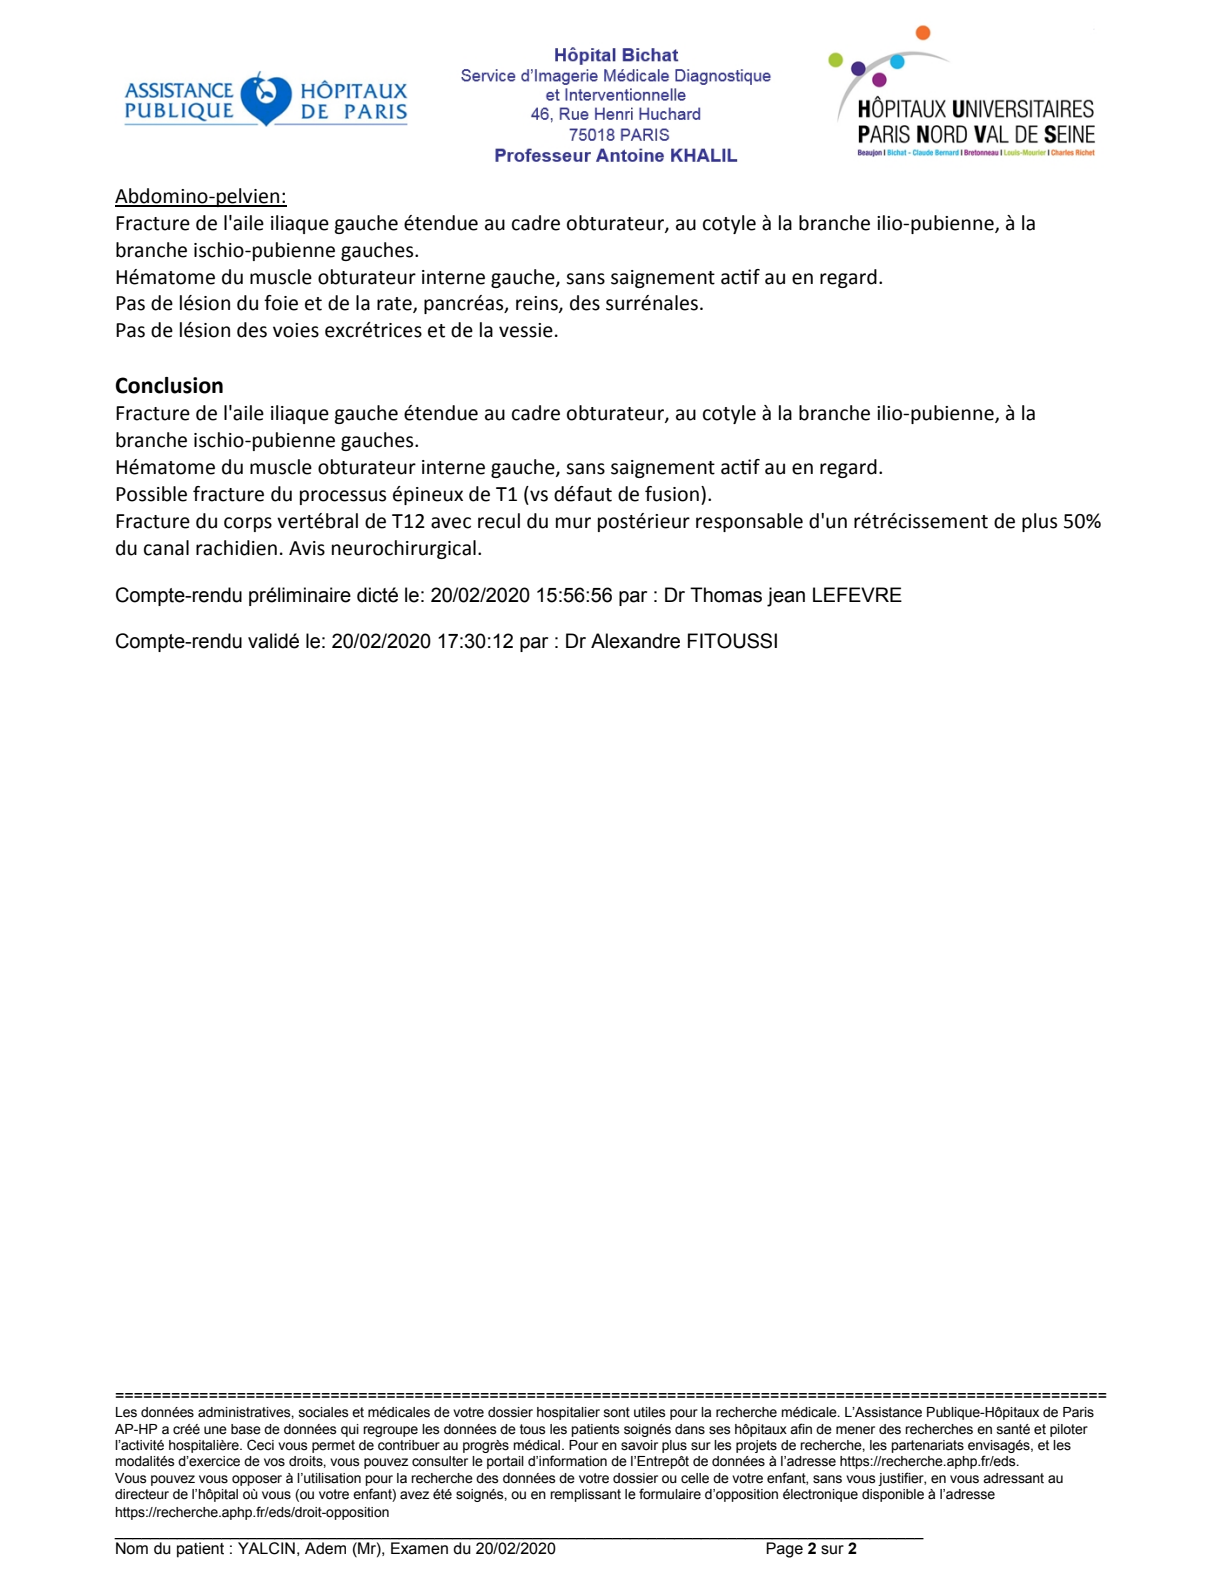

In [8]:
from edspdf.visualization.annotations import show_annotations
from edspdf.structures import TextBox

content = pdf_10535594504
content_boxes = [TextBox(x0=ann['x0'], x1=ann['x1'], y0=ann['y0'], y1=ann['y1'], label=ann['label'], text='empty')
                 for ann in annotation_10535594504['annotations']]
display(show_annotations(content, content_boxes)[1])

In [7]:
print(annotation_10535594504)

{'note_id': 10535594504, 'note_type': 'CR-IMAGE', 'orbis': False, 'annotations': [{'page': 0.0, 'x0': 0.0940359477124183, 'y0': 0.540340909090909, 'x1': 0.8998596405228753, 'y1': 0.8089646464646465, 'label': 'body', 'note_id': 10535594504}, {'page': 0.0, 'x0': 0.0940359477124183, 'y0': 0.1758459595959596, 'x1': 0.8968300653594775, 'y1': 0.31225757575757573, 'label': 'header', 'note_id': 10535594504}, {'page': 0.0, 'x0': 0.0940359477124183, 'y0': 0.8761944444444445, 'x1': 0.9046385620915065, 'y1': 0.9595126262626262, 'label': 'pollution', 'note_id': 10535594504}, {'page': 1.0, 'x0': 0.0940359477124183, 'y0': 0.8761944444444445, 'x1': 0.9046385620915065, 'y1': 0.9595126262626262, 'label': 'pollution', 'note_id': 10535594504}, {'page': 1.0, 'x0': 0.0940359477124183, 'y0': 0.2549242424242424, 'x1': 0.8998596405228753, 'y1': 0.3536616161616162, 'label': 'body', 'note_id': 10535594504}, {'page': 1.0, 'x0': 0.0940359477124183, 'y0': 0.13446969696969702, 'x1': 0.8467666666666662, 'y1': 0.21635

In [ ]:
content = pdf